# IMPORT

In [2]:
import pandas as pd
import numpy as np
import os
import re
from sklearn.model_selection import train_test_split


# FUNCTION

In [3]:
def clean_text(
        text,
        methods=['rmv_link', 'rmv_punc', 'lower', 'rmv_space'],
        custom_punctuation = '!"#$%&\'()*+,.-:;<=>?@[\\]^_/`{|}~”“',
    ):
    cleaned_text = text
    for method in methods:
        if method == 'rmv_link':
            # Remove link
            cleaned_text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', cleaned_text)
            cleaned_text = "".join(cleaned_text)
        elif method == 'rmv_punc':
            # Remove punctuation
            cleaned_text = re.sub('[%s]' % re.escape(custom_punctuation), '' , cleaned_text)
        elif method == 'lower':
            # Lowercase
            cleaned_text = cleaned_text.lower()
        elif method == 'rmv_space':
            # Remove extra space
            cleaned_text = re.sub(' +', ' ', cleaned_text)
            cleaned_text = cleaned_text.strip()
    return cleaned_text

In [4]:
def preprocessing_text(text):
    text = text.replace("'s", "")
    text = re.sub(r'[^a-zA-Z0-9\s\.,!?\-\%\$€£]', ' ', text)
    text = clean_text(
        text=text,
        custom_punctuation="#$}{!)(?|-#$%&<=>?@[\\]^_/`{|}~”“"
    )
    return text

In [5]:
def preprocessing_label(label):
    label2id = {
        "positive": 1,
        "negative": 0,
        "neutral": 2,
    }
    return label2id[label]

# LOAD DATA

In [6]:
# data_path = r"F:\UNIVERSITY\Project\Sentiment-Analysis-Airflow\Financial-Sentiment-Analysis\project_2_training\data\all-data.csv"
data_path = r"C:\APAC\all_projects\finetuning-airflow-project\project_2_training\data\all-data.csv"
df = pd.read_csv(data_path, encoding="ISO-8859-1", header=None)
df.columns = ["label", "title"]

# PREPROCESSING

In [7]:
df["title"] = df["title"].apply(preprocessing_text)
df["label"] = df["label"].apply(preprocessing_label)

# TRAIN TEST SPLIT

In [8]:
X, y = df["title"], df["label"]

In [9]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# EDA

In [10]:
def visualize_label_distribution(y):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Map numerical labels back to names for visualization
    id2label = {0: "negative", 1: "positive", 2: "neutral"}
    
    # Count the occurrences of each label
    label_counts = y.value_counts().sort_index()
    label_names = [id2label[i] for i in label_counts.index]
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar plot
    axes[0].bar(label_names, label_counts.values, color=['#d32f2f', '#388e3c', '#1976d2'])
    axes[0].set_xlabel('Sentiment', fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
    axes[0].set_title('Label Distribution (Bar Chart)', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, (label, count) in enumerate(zip(label_names, label_counts.values)):
        axes[0].text(i, count + max(label_counts.values) * 0.01, str(count), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Pie chart
    colors = ['#d32f2f', '#388e3c', '#1976d2']
    axes[1].pie(label_counts.values, labels=label_names, autopct='%1.1f%%', 
                colors=colors, startangle=90, textprops={'fontsize': 11})
    axes[1].set_title('Label Distribution (Pie Chart)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

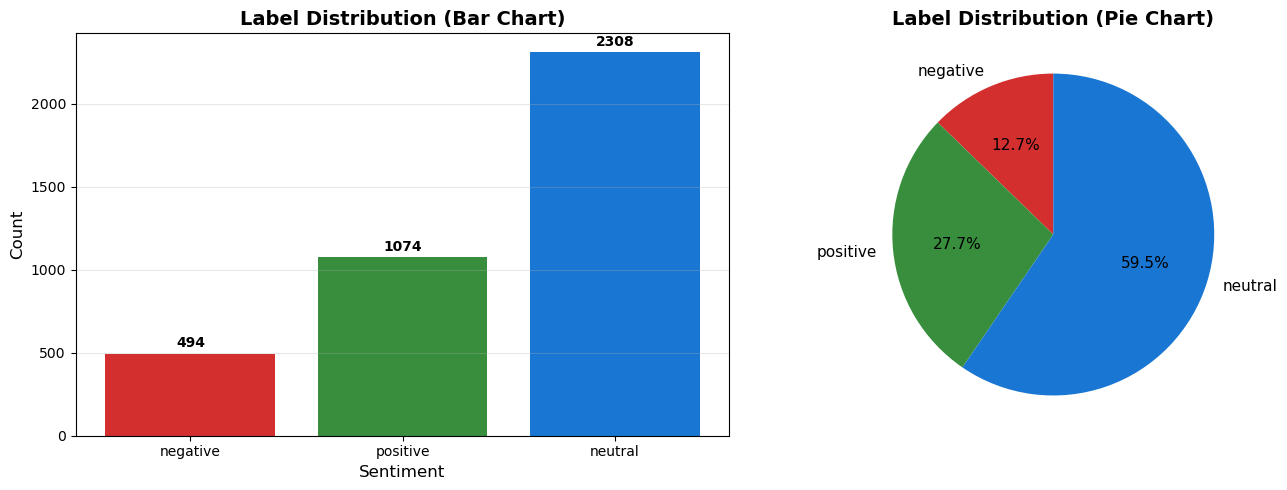

In [11]:
visualize_label_distribution(y_train)

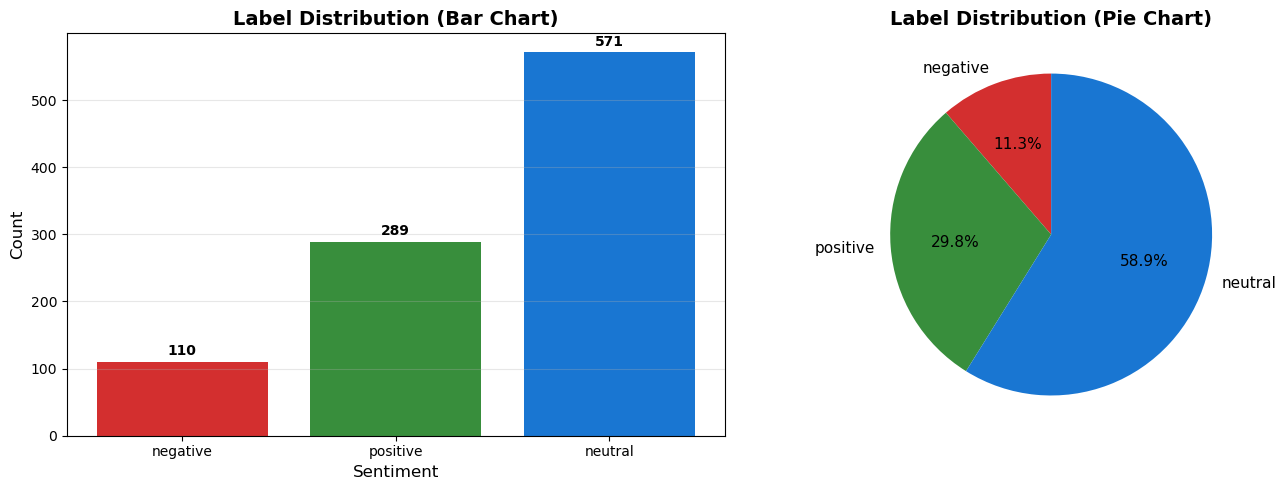

In [12]:
visualize_label_distribution(y_test)

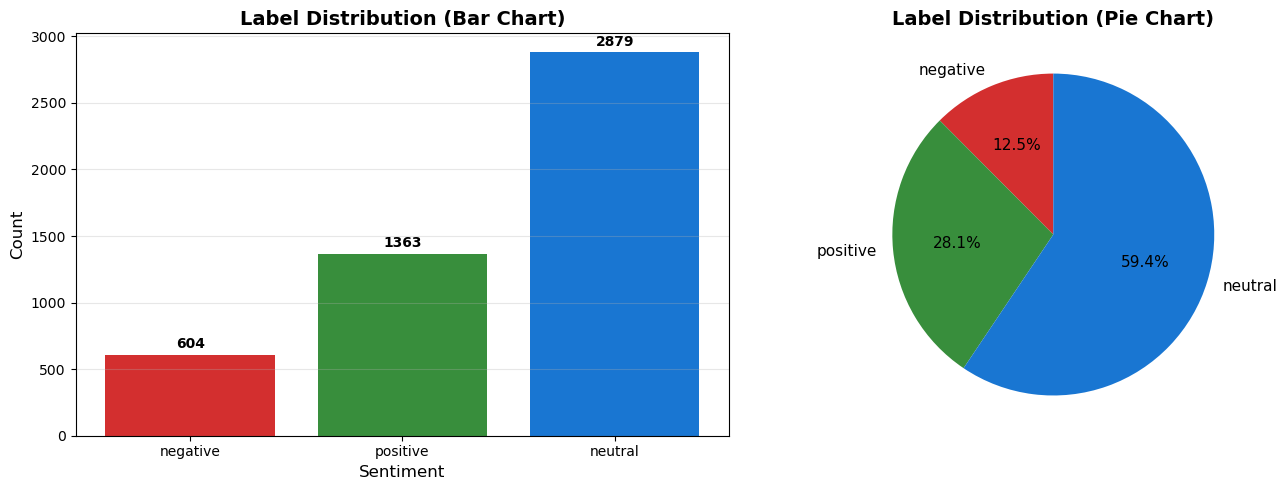

In [13]:
visualize_label_distribution(y)

# SAVE

In [14]:
# save_dir = r"F:\UNIVERSITY\Project\Sentiment-Analysis-Airflow\Financial-Sentiment-Analysis\project_2_training\data"
save_dir = r"C:\APAC\all_projects\finetuning-airflow-project\project_2_training\data"
df_train = pd.concat([X_train, y_train], axis=1)
# df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [15]:
df_train.to_csv(os.path.join(save_dir, "train.csv"))
# df_val.to_csv(os.path.join(save_dir, "val.csv"))
df_test.to_csv(os.path.join(save_dir, "test.csv"))

# TEST